# **Calculating the mass of the Milky Way's black hole a bit more precisely**

Alright, we've now successfully calculated the mass of Sgr A*; however, we cut some corners to get there. We're now going to try and do this a tad more precisely. This is typically how science is done - we do a first approximation to see if the general method is reasonable, then we tweak and tweak until it converges on a more precise answer.

So today, we'll explore slightly different variations of how to calculate the semi-major axis and period. Let's start with the semi-major axis 🤠

 # 🌈**Linear Regression & Conic Sections**🌈

 Recall that our previous method for finding the semi-major axis of S0-2's orbit was basically fancy eyeballing. Now let's try even fancier eyeballing.
We're going to try fitting to the data with a method known as "Least Squares Regression". This is essentially what you were just trying to do by eye but more precise -- **the method calculates the exact placement of the ellipse such that the distance between the curve to each individual point is minimized for all points.** Here's an example. (whiteboard)

![alt text](https://www.reneshbedre.com/assets/posts/reg/reg_front.svg)


To be able to fit to the shape of an ellipse using linear regression, we can use a different equation which describes the shape of the ellipse. The formula I previously showed you is usually what people mean when they say "general form of an ellipse".

The equation I am about to show you is the general equation for any *conic section*. A conic section can either be a circle, a parabola, a hyperbola, or an ellipse, depending on the constants used in the equation. All orbits can be described as either hyperbolic, parabolic, elliptical, or circular. **Again: these are all conic sections!**

![alt text](https://www.astronomy.ohio-state.edu/thompson.1847/1101/OrbitFamilies.gif)

# The general equation for any conic section is:

$$Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0$$

# There is one piece of information that we already know for sure because we are working with an ellipse. What do you think that piece is?
.
.
.
.
.
.


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


[ 0.00050266  0.0001326   0.00163306 -0.08321422  0.02897452]


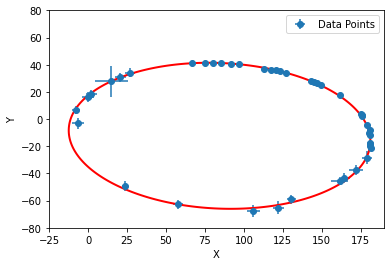

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Extract x coords and y coords of the ellipse as column vectors
# need to make our x_mas and y_mas data into column vectors.
# For example [[1, 2, 3]] as a column vector is [[1], [2], [3]].
# calculate the center of the ellipse by subtracting the largest x value from the smallest x value

x_mas_arr = np.array(x_mas)
y_mas_arr = np.array(y_mas)

X = (np.array([x_mas])).T
Y = (np.array([y_mas])).T

# Formulate and solve the least squares problem ||Ax - b ||^2
A = np.hstack([X**2, X * Y, Y**2, X, Y])
b = np.ones(len(X))
x = np.linalg.lstsq(A, b)[0].squeeze()

# Print the equation of the ellipse in standard form
print(x)

# Plot the noisy data
plt.errorbar(X, Y, yerr = y_error_mas, xerr= x_error_mas,label='Data Points', ls = 'none', marker="o")

# Plot the original ellipse from which the data was generated
#phi = np.linspace(0, 2*np.pi, 1000).reshape((1000,1))
#c = np.hstack([np.cos(phi), np.sin(phi)])
#ground_truth_ellipse = c.dot(B)
#plt.plot(ground_truth_ellipse[:,0], ground_truth_ellipse[:,1], 'k--', label='Generating Ellipse')

# Plot the least squares ellipse

x_coord = np.linspace(-200,200,300)
y_coord = np.linspace(-80,80,300)
X_coord, Y_coord = np.meshgrid(x_coord, y_coord)
Z_coord = x[0] * X_coord ** 2 + x[1] * X_coord * Y_coord + x[2] * Y_coord**2 + x[3] * X_coord + x[4] * Y_coord
plt.contour(X_coord, Y_coord, Z_coord, levels=[1], colors=('r'), linewidths=2)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim([-25,190])
plt.show()

If we did everything else right, this should be looking pretty good! Now, at long last...we still need to calculate the semi-major axis. Unlike for that first equation of an ellipse I showed you guys, the semi-major axis isn't actually given by any one coefficient from the conic sections equation. I dug up the following formula to calculate the semi-major axis:

$$ a = \frac{\sqrt{2{\frac{AE^2 - BDE + CD^2}{4AC-B^2}} - F}}{\sqrt{A+C+\sqrt{(A-C^2 + B^2)}}} $$

Try making a function that describes this formula so that we can calculate the semi-major axis in python.

In [ ]:
# now solve for the semi-major axis
def semi_major_axis(A,B,C,D,E,F):
    numerator = 2 * (((A*E**2 - B*D*E + C*D**2)/(4*A*C - B**2)) - F)
    denominator = A + C - np.sqrt((A-C)**2 + B**2)
    return np.sqrt(numerator/denominator)

semi_major_axis = semi_major_axis(0.000503, 0.000133, 0.00163, -0.0832, 0.029, -1)

In [ ]:
print(semi_major_axis)

96.90976528425887


One last thing on the semi-major axis. Let's create a function that compares the two semi-major axis values that we've calculated. We can use the formula for percent difference to do this:

$$\text{percent difference} = \frac{|\text{First value - Second value}|}{|\text{(First value + second value)}/2|} \times 100$$

Where the "|" means take the absolute value. As a reminder |2| = 2 and |-2| = 2. Basically, if the number is negative, make it positive. You can do this in python with numpy: np.abs(-2)  will return 2.

In [ ]:
# make another function to calculate the percent difference between the two semi-major axis values we've got

# don't forget to print it at the end :)

Cool, now we have two values for the semi-major axis as well as the percent difference between them! Does anyone remember an estimate for the semi-major axis from their literature search? If not, let's pause and go look for one. How does it compare to our two values?


## .........................


# Let's move on to our more precise way of calculating the period and then we can use these values to re-calculate the mass.

# **Finding the period of S0-2's orbit around Sgr A***

Recall that we originally estimated the period by saying *shrug* close enough and subtracting the latest time from the earliest time, even though they did not technically complete the orbit.

Let's do some 🌈physics🌈 🤠✨🕺 (whiteboard)

(-40.0, 0.0)

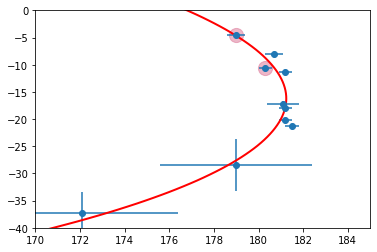

In [ ]:
# plot data
plt.errorbar(X, Y, yerr = y_error_mas, xerr= x_error_mas,label='Data Points', ls = 'none', marker="o")
# plot ellipse
plt.contour(X_coord, Y_coord, Z_coord, levels=[1], colors=('r'), linewidths=2)
# plot earliest and latest dat points, make them look unique
selected_x = (x_mas_arr[-6],x_mas_arr[-8])
selected_y = (y_mas_arr[-6],y_mas_arr[-8])
plt.scatter(selected_x, selected_y,color = 'palevioletred', alpha = 0.5, s = 200)
plt.xlim([170,185])
plt.ylim([-40,0])

In [ ]:
date_yr = np.array(stellar_positions["Date (year)"])
dt = date_yr[-6] - date_yr[-8]
dx = x_mas_arr[-6] - x_mas_arr[-8]
dy = y_mas_arr[-6] - y_mas_arr[-8]

velocity = np.sqrt(dx**2 + dy**2)/dt

new_dx = x_mas_arr[-1] - x_mas_arr[0]
new_dy = y_mas_arr[-1] - y_mas_arr[0]
new_dt = np.sqrt(new_dx**2 + new_dy**2)/velocity

print(period_est+new_dt)

15.86136340287391


I think this matches better with known observations of S0-2's period. Did anyone find another period estimate during their literature search? If not, let's pause and do another one to see if we got closer.

# ................

So now we have two unique values for the period, and two unique values for the semi-major axis.

But which values should we use? Well, as a scientist, it's good to explore and understand every possible outcome. So...let's calculate all of the possible masses we can get from these values. It's easy to see that there are four possible masses we can calculate from $a_1$, $a_2$, $T_1$, and $T_2$ from Kepler's Third Law:

$$T^2 = \frac{4\pi^2}{GM}a^3$$

Rearranging and setting everything equal to M, we get:

$$M = \frac{4\pi^2}{GT^2}a^3$$

And so our four possible masses are (notice the subscripts on the semi-major axis, period, and mass):

$$M_1 = \frac{4\pi^2}{GT_1^2}a_1^3 \text{,     }
M_2 = \frac{4\pi^2}{GT_1^2}a_2^3 \\
M_3 = \frac{4\pi^2}{GT_2^2}a_1^3 \text{,     }
M_4 = \frac{4\pi^2}{GT_2^2}a_2^3  $$


Try calculating these four masses using your function from yesterday.

# .....................................

Let's try one more thing. Let's go back to a mass that we found in our literature search and compare our four masses to that.

This time, instead of calculating a percent difference, we're going to calculate a percent error, by making the assumption that the literature value is the true mass of Sgr A* (this is not necessarily true, but nonetheless it's a reasonable assumption to make).

The percent error formula is defined as,


$$\text{percent error} = \frac{|\text{Measured value - true value}|}{|\text{True value}|} \times 100$$



Make a function to calculate percent error. Then, we can put all of our results on a plot of percent error vs black hole mass. We can also add a vertical line to show the "true" mass of Sgr A*.

(100000, 50000000)

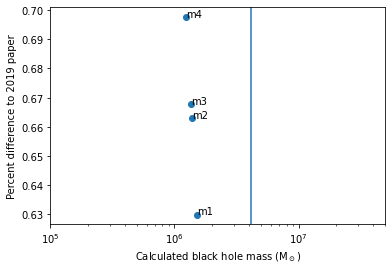

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculateMass(period, semi_major_axis):
    period_s = period * 3.156*10**7
    a_meters = semi_major_axis * (41/1000) * 2.59*10**(13)
    G = 6.67*10**(-11)
    mas2rads = (1/1000) * (1/3600) * (np.pi/180)
    distance_meters = (41 / (1000*mas2rads)) * 2.59*10**(13)
    m_sun = 2*10**(30)
    mass_kg = 4*np.pi**2 * (1/G) * (1/period_s**2) * a_meters**3
    return mass_kg/m_sun


m1 = calculateMass(15.292000000000144, 100)
m2 = calculateMass(15.292000000000144, 96.90976528425887)
m3 = calculateMass(16.14445822475051, 100)
m4 = calculateMass(16.14445822475051,96.90976528425887)
actual_mass = 4.11*10**6
masses = np.array([m1,m2,m3,m4])

massnames = np.array(["m1","m2","m3","m4"])

def percent_diff(actual_mass,mass):
    return ((actual_mass - mass) / actual_mass)

masses_percent_diff = percent_diff(actual_mass, masses)

plt.semilogx(masses,masses_percent_diff, marker="o", ls ="none")
plt.axvline(x=actual_mass)
for i in range(len(massnames)):
    plt.annotate(massnames[i], (masses[i],masses_percent_diff[i]))

plt.xlabel("Calculated black hole mass (M$_\odot$)")
plt.ylabel("Percent difference to 2019 paper")
plt.xlim(10**5,5*10**7)

All of our masses have a < 1% difference to the true mass of Sgr A*, which is good! It's also correct "to an order of magnitude", which any astronomer loves to see.

However, they're all consistently lower than the true mass. Why might that be the case?

![alt text](https://meowconnectioncom.files.wordpress.com/2017/02/296622-bigthumbnail.jpg)

![alt text](https://images.fineartamerica.com/images/artworkimages/mediumlarge/2/thinking-cat-douglas-sacha.jpg)